In [13]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Wrangle Data

In [14]:
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
)

new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

df = df_orig.append(new)

In [15]:
df.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


# Explore Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13978 entries, 0 to 3
Data columns (total 7 columns):
ip                13978 non-null object
timestamp         13978 non-null object
request_method    13978 non-null object
status            13978 non-null int64
size              13978 non-null int64
destination       25 non-null object
request_agent     13978 non-null object
dtypes: int64(2), object(5)
memory usage: 873.6+ KB


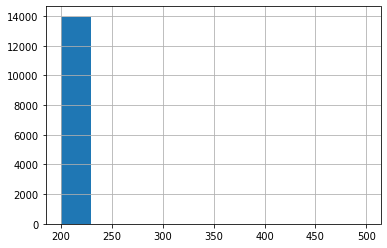

In [17]:
df.status.hist()

In [18]:
df.status.value_counts()

200    13960
499       16
301        2
Name: status, dtype: int64

In [19]:
df[df.status == 301]

,ip,timestamp,request_method,status,size,destination,request_agent
1,95.31.16.121,[17/Apr/2019:19:36:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,301,1005,NaN,python-requests/2.21.0
2,97.105.15.120,[18/Apr/2019:19:42:41+0000],GET /api/v1/sales?page=79/HTTP/1.1,301,2560,NaN,python-requests/2.21.0


In [20]:
df[df.status == 499]

,ip,timestamp,request_method,status,size,destination,request_agent
1745,97.105.19.58,[16/Apr/2019:19:55:15 +0000],"""GET /api/v1/sales?page=2 HTTP/1.1""",499,0,NaN,"""python-requests/2.20.1"""
1819,97.105.19.58,[16/Apr/2019:19:56:02 +0000],"""GET /api/v1/sales?page=21 HTTP/1.1""",499,0,NaN,"""python-requests/2.20.1"""
4242,97.105.19.58,[16/Apr/2019:20:28:46 +0000],"""GET /api/v1/sales?page=2 HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
4405,97.105.19.58,[16/Apr/2019:20:33:24 +0000],"""GET /api/v1/sales?page=29 HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
4790,97.105.19.58,[16/Apr/2019:20:38:13 +0000],"""GET /api/v1/items HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
4862,97.105.19.58,[16/Apr/2019:20:38:55 +0000],"""GET /api/v1/items HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
4871,97.105.19.58,[16/Apr/2019:20:39:00 +0000],"""GET /api/v1/items HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
5520,97.105.19.58,[16/Apr/2019:20:45:17 +0000],"""GET /api/v1/items HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
5539,97.105.19.58,[16/Apr/2019:20:45:28 +0000],"""GET /api/v1/sales?page=2 HTTP/1.1""",499,0,NaN,"""python-requests/2.21.0"""
6860,97.105.19.58,[16/Apr/2019:21:00:35 +0000],"""GET /api/v1/sales?page=115 HTTP/1.1""",499,0,NaN,"""python-requests/2.20.1"""


# Cleanup Data

In [21]:
df.timestamp = df.timestamp.str.replace(r'(\[|\])', '', regex=True)
df.timestamp= pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 
df = df.set_index('timestamp')

In [22]:
df.request_agent = df.request_agent.str.strip()

In [25]:
for col in ['request_method', 'request_agent', 'destination']:
    df[col] = df[col].str.replace('"', '')

df['request_method'] = df.request_method.str.replace(r'\?page=[0-9]+', '', regex=True)

df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0


In [26]:
df.request_agent.value_counts()

python-requests/2.21.0                                                                                                       12005
python-requests/2.20.1                                                                                                        1911
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36       34
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0                                               8
Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots)                                                                       7
Slackbot 1.0 (+https://api.slack.com/robots)                                                                                     6
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36        4
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gec

In [31]:
# the range of dates we are looking at

df.index.value_counts(sort=False, bins = 10)

(2019-04-16 19:28:04.320999935, 2019-04-17 06:37:29.900000]    13903
(2019-04-17 06:37:29.900000, 2019-04-17 17:40:17.800000]          71
(2019-04-17 17:40:17.800000, 2019-04-18 04:43:05.700000]           1
(2019-04-18 04:43:05.700000, 2019-04-18 15:45:53.600000]           0
(2019-04-18 15:45:53.600000, 2019-04-19 02:48:41.500000]           1
(2019-04-19 02:48:41.500000, 2019-04-19 13:51:29.400000]           0
(2019-04-19 13:51:29.400000, 2019-04-20 00:54:17.300000]           1
(2019-04-20 00:54:17.300000, 2019-04-20 11:57:05.200000]           0
(2019-04-20 11:57:05.200000, 2019-04-20 22:59:53.100000]           0
(2019-04-20 22:59:53.100000, 2019-04-21 10:02:41]                  1
Name: timestamp, dtype: int64

In [32]:
df.head()

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,0.488753
2019-04-16 19:34:42+00:00,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,0.003396
2019-04-16 19:34:44+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,0.486472
2019-04-16 19:34:46+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,0.486377
2019-04-16 19:34:48+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,0.488246


In [30]:
df.tail()

,ip,request_method,status,size,destination,request_agent,size_mb
timestamp,,,,,,,
2019-04-17 12:55:14+00:00,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510166,NaN,python-requests/2.21.0,0.486532
2019-04-21 10:02:41+00:00,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0,1.099591
2019-04-17 19:36:41+00:00,95.31.16.121,GET /api/v1/sales/HTTP/1.1,301,1005,NaN,python-requests/2.21.0,0.000958
2019-04-18 19:42:41+00:00,97.105.15.120,GET /api/v1/sales/HTTP/1.1,301,2560,NaN,python-requests/2.21.0,0.002441
2019-04-19 19:42:41+00:00,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,NaN,python-requests/2.21.0,1.961066


In [28]:
df['size_mb'] = [n/1024/1024 for n in df['size']]

In [29]:
df.describe()

,status,size,size_mb
count,13978.000000,1.397800e+04,13978.000000
mean,200.356703,4.500019e+05,0.429155
std,10.182001,1.614915e+05,0.154010
min,200.000000,0.000000e+00,0.000000
25%,200.000000,5.006370e+05,0.477445
50%,200.000000,5.101380e+05,0.486506
75%,200.000000,5.112910e+05,0.487605
max,499.000000,2.056327e+06,1.961066


In [33]:
df.request_method

timestamp
2019-04-16 19:34:42+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:42+00:00     GET /api/v1/items HTTP/1.1
2019-04-16 19:34:44+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:46+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:48+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:48+00:00    GET /api/v1/stores HTTP/1.1
2019-04-16 19:34:50+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:52+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:52+00:00                 GET / HTTP/1.1
2019-04-16 19:34:53+00:00     GET /api/v1/items HTTP/1.1
2019-04-16 19:34:53+00:00     GET /api/v1/items HTTP/1.1
2019-04-16 19:34:53+00:00     GET /api/v1/items HTTP/1.1
2019-04-16 19:34:54+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:54+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:56+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:34:58+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:35:01+00:00     GET /api/v1/sales HTTP/1.1
2019-04-16 19:35:03+0

In [36]:
df.parts = df.request_method.str.split(' ')

In [38]:
df.parts.head()

timestamp
2019-04-16 19:34:42+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-16 19:34:42+00:00    [GET, /api/v1/items, HTTP/1.1]
2019-04-16 19:34:44+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-16 19:34:46+00:00    [GET, /api/v1/sales, HTTP/1.1]
2019-04-16 19:34:48+00:00    [GET, /api/v1/sales, HTTP/1.1]
Name: request_method, dtype: object